<a href="https://colab.research.google.com/github/ari97ag/Universidad/blob/main/Poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#Insertar la base POVERTY
import pandas as pd
import numpy as np
poverty = pd.read_csv("POVERTY.txt",sep=";",header=0, index_col=3)

In [6]:
poverty.head()

,Birth,Death,InfantDeath
Country,,,
Albania,24.7,5.7,30.8
Bulgaria,12.5,11.9,14.4
Czechoslovakia,13.4,11.7,11.3
Former_E._Germany,12.0,12.4,7.6
Hungary,11.6,13.4,14.8


In [9]:
#np.shape(poverty) 3 variables con 97 datos
print(poverty.describe())

           Birth      Death  InfantDeath
count  97.000000  97.000000    97.000000
mean   29.229897  10.836082    54.901031
std    13.546695   4.647495    45.992584
min     9.700000   2.200000     4.500000
25%    14.500000   7.800000    13.100000
50%    29.000000   9.500000    43.000000
75%    42.200000  12.500000    83.000000
max    52.200000  25.000000   181.600000


In [23]:
from sklearn.cluster import KMeans
km=KMeans (init="k-means++",n_clusters=3,n_init=10)
km.fit(poverty)
print(km.labels_)
print()
print(km.cluster_centers_)
print()
print("La suma de cuadrados dentro de los grupos es:",km.inertia_)
print()
print("Tasa natalidad, Tasa mortalidad, Tasa de mortalidad infantil")
print("Si un pais 20, 13 y 50, se tiene que este pasi puede ser clasificado bajo el cluster:",km.predict([[20,13,50],]))
print(km.predict([[20,13,50],[10,5,10]]))

[0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 2 2 2 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 2 0 2 0 2 2 2 2 0 1 1 0 0 2 2 0 0 2 1 1 2 0 0 0 2 2 1 2 2
 2 1 1 1 2 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 2 2 2]

[[ 16.57555556   8.75555556  14.17111111]
 [ 44.39545455  16.51363636 124.87727273]
 [ 37.09         9.79333333  64.68      ]]

La suma de cuadrados dentro de los grupos es: 22458.07442424242

Tasa natalidad, Tasa mortalidad, Tasa de mortalidad infantil
Si un pais 20, 13 y 50, se tiene que este pasi puede ser clasificado bajo el cluster: [2]
[2 0]


<function matplotlib.pyplot.show>

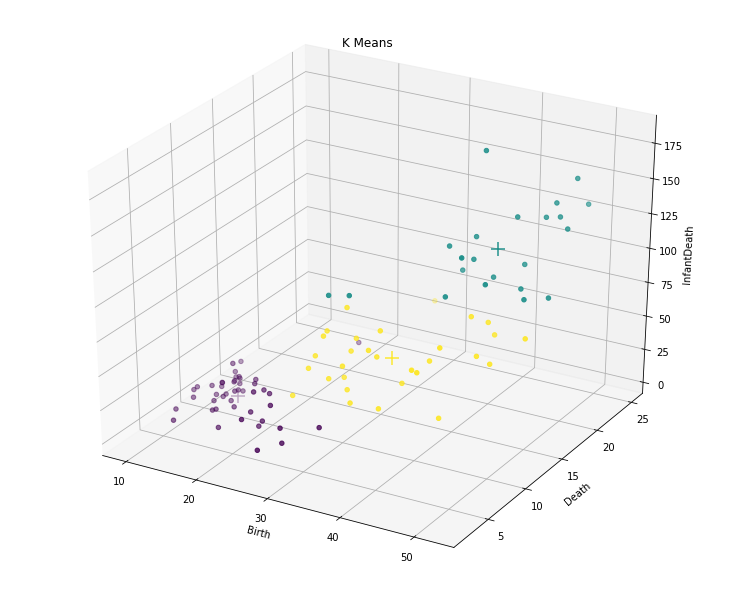

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X=np.array(poverty)
C=km.cluster_centers_
fig=plt.figure(figsize=(10,8))
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=km.labels_)
ax.scatter(C[:,0],C[:,1],C[:,2],marker="+",c=[0,1,2],s=200)
ax.set_xlabel("Birth")
ax.set_ylabel("Death")
ax.set_zlabel("InfantDeath")
ax.set_title("K Means")
plt.show

In [29]:
from sklearn.metrics import silhouette_score
silo=np.zeros(10)
ssw=np.zeros(10)
for i in range(10):
  km=KMeans(init="k-means++",n_clusters=i+2,n_init=10)
  clust=km.fit(poverty)
  clust2=clust.labels_
  ssw[i]=clust.inertia_
  silo[i]=silhouette_score(poverty,clust2)
print(ssw)
print()
print(silo)

[55563.63436364 22458.07442424 15828.73020499 11119.10463002
  8290.68743106  6429.32879469  5336.34732055  4761.33089198
  4439.67058751  4007.02422619]

[0.64351518 0.63905419 0.58267703 0.55090953 0.52857032 0.52858663
 0.50367876 0.50744874 0.47394671 0.45359457]


<function matplotlib.pyplot.show>

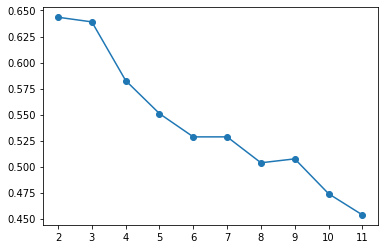

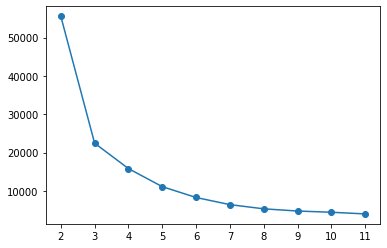

In [31]:
plt.figure()
plt.plot(np.arange(2,12),silo)
plt.scatter(np.arange(2,12),silo)
plt.xticks(np.arange(2,12))
plt.show
print()
plt.figure()
plt.plot(np.arange(2,12),ssw)
plt.scatter(np.arange(2,12),ssw)
plt.xticks(np.arange(2,12))
plt.show

In [35]:
from sklearn.metrics import silhouette_samples
km=KMeans(init="k-means++",n_clusters=3,n_init=10)
cluster=km.fit(poverty)
cluster2=cluster.labels_
sample_silo=silhouette_samples(poverty,cluster2)
print(np.mean(sample_silo))

0.6390541921509522


In [41]:
%pip install scikit-plot

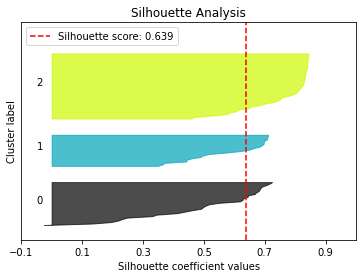

In [44]:
import scikitplot as skplt

skplt.metrics.plot_silhouette(poverty, cluster2)
plt.show()
# La idea es ver la cohesión dentro del grupo y que supere la vertical de la media de silueta
# La silueta mide que tan bien es la distancia dentro d elos cluster
# Si es cercana a cero o negativa los grupos estan superpuestos

In [45]:
%pip install pyclustering

     |████████████████████████████████| 2.6MB 9.9MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395106 sha256=d77b522b383ee9c7338126b5ffdd78c7a5e2260d9941845805921cc41ffb7746
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering
